# classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### sigmoid

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### experiment

In [3]:
z = np.arange(-20,20)
y = sigmoid(z)
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z, y])

Input (z), Output (sigmoid(z))
[[-2.000e+01  2.061e-09]
 [-1.900e+01  5.603e-09]
 [-1.800e+01  1.523e-08]
 [-1.700e+01  4.140e-08]
 [-1.600e+01  1.125e-07]
 [-1.500e+01  3.059e-07]
 [-1.400e+01  8.315e-07]
 [-1.300e+01  2.260e-06]
 [-1.200e+01  6.144e-06]
 [-1.100e+01  1.670e-05]
 [-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]
 [ 1.100e+01  1.000e+00]
 [ 1.200e+01  1.000e+00]
 [ 1.300e+01  1.000e+00]
 [ 1.400e+01  1.000e+00]
 [ 1.500e+01  1.000e+00]
 [ 1.600e+01  1.000e+00]
 [ 1.700e+01  1.000e+00]
 [ 1.800e+01  1.000

Text(0.5, 0, 'z')

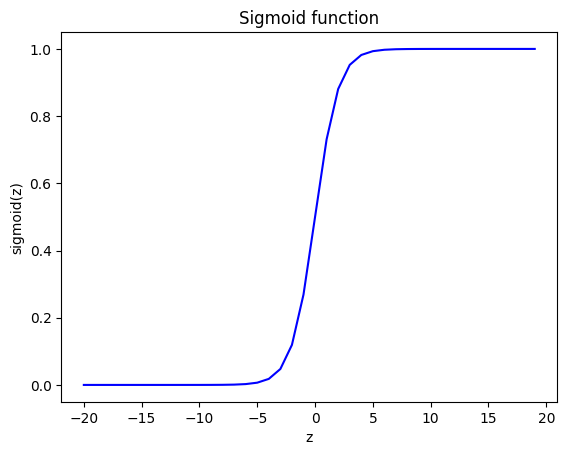

In [4]:
ax = plt.plot(z, y, c="b")

plt.title("Sigmoid function")
plt.ylabel('sigmoid(z)')
plt.xlabel('z')

### cost function for logistic regression
$$
J(\vec{w},b)= -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log \left( f_{\mathbf{w},b} \left( \mathbf{x}^{(i)} \right) \right) + (1 - y^{(i)}) \log \left( 1 - f_{\mathbf{w},b} \left( \mathbf{x}^{(i)} \right) \right) \right]
$$


In [5]:
def J_function(W,b,X,y):
    f_wb = 1 / (1+np.exp(-(np.dot(X,W) + b)))
    sum = np.dot(y,np.log(f_wb)) + np.dot((1-y),np.log(1-f_wb))
    return -1/X.shape[0] * sum
    

### gradient descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

In [6]:
def partial_derivative(W,b,X,y):
    """
    Compute the partial derivatives of the cost function with respect to W and b.

    Args:
      W (ndarray (n,)): Model parameters (weights)
      b (scalar): Model parameter (bias)
      X (ndarray (m, n)): Input data (m records, n features)
      y (ndarray (m,)): Target values

    Returns:
      DJ_DW (ndarray (n,)): Partial derivatives with respect to W
      dj_db (scalar): Partial derivative with respect to b
    """
    number_of_features = n = X.shape[1]
    number_of_records = m = X.shape[0]
    DJ_DW = np.zeros(number_of_features)
    dj_db = 0.0
    errors = 1 /(1 + np.exp(-np.dot(X,W) - b)) - y   
    dj_db = np.sum(errors)/m  
    for j in range(number_of_features):
        DJ_DW[j] = (np.sum(errors * X[:,j]))/m #+ W[j] + lambda_/m
    return DJ_DW, dj_db


In [35]:
def gradient_descent(Init_W,init_b,alpha,times,X_Training,y_training):  
    """
    Perform gradient descent optimization to find optimal model parameters.
    
    This function iteratively updates weights (W) and bias (b) to minimize 
    the cost function using gradient descent algorithm.
    
    Args:
        Init_W (numpy.ndarray): Initial weights vector 
            Shape: (number_of_features,)
        init_b (float): Initial bias value
        alpha (float): Learning rate controlling step size of parameter updates
        times (int): Maximum number of iterations to perform
        X_Training (numpy.ndarray): Training feature matrix 
            Shape: (number_of_samples, number_of_features)
        y_training (numpy.ndarray): Training target values 
            Shape: (number_of_samples,)
    
    Returns:
        tuple: 
            - W (numpy.ndarray): Optimized weights vector
            - b (float): Optimized bias value
    """
    
    x_axis = []
    y_axis = []
    W = Init_W
    number_of_features = n = W.shape[0]
    b = init_b
    for i in range(times):
        DJ_DW,dj_db = partial_derivative(W,b,X_Training,y_training)
        b = b - alpha*dj_db        
        W = W - DJ_DW * alpha
        x_axis.append(i)
        cost = J_function(W,b,X_Training,y_training)
        y_axis.append(cost)
        if(cost < 1e-10):
            print(i)
            break
    #plt.plot(x_axis,y_axis)
    return W,b

def gradient_descent_algorithm(X_Training,y_training):
    """
    Prepare and execute gradient descent optimization.
    
    Sets up initial parameters and calls gradient descent function.
    
    Args:
        X_Training (numpy.ndarray): Training feature matrix 
            Shape: (number_of_samples, number_of_features)
        y_training (numpy.ndarray): Training target values 
            Shape: (number_of_samples,)
    
    Returns:
        tuple: 
            - W (numpy.ndarray): Optimized weights vector
            - b (float): Optimized bias value
    
    Configuration:
        - Initial weights set to zero
        - Initial bias set to 0.0
        - Learning rate (alpha) set to 5.0e-8
        - Maximum iterations set to 10,000
    """
    number_of_features = X_Training.shape[1]
    Init_W = np.full(number_of_features,0)
    init_b = 0.
    alpha = 0.001 #if you normalize data you must choose smaller learning rate
    times = 100000
    return gradient_descent(Init_W,init_b,alpha,times,X_Training,y_training)
        


### some tests


w:[5.12]
b: -12.609503113679205
loss: 0.02538226757815515


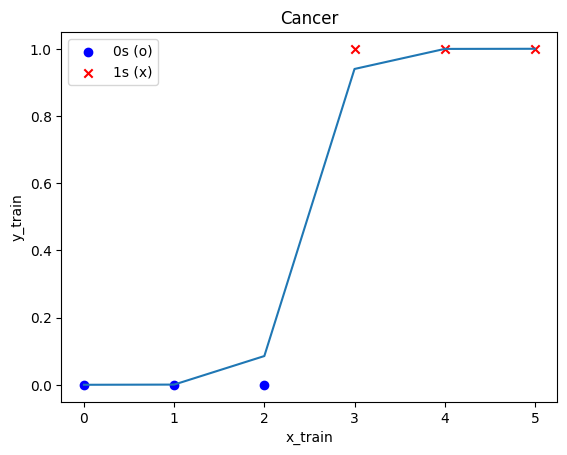

In [37]:
x_train = np.array([[0.], [1], [2], [3], [4], [5]])
y_train = np.array([0,  0, 0, 1, 1, 1])

W,b = gradient_descent_algorithm(x_train,y_train)
plt.plot(sigmoid(np.dot(x_train,W) + b))
print(f"w:{W}\nb: {b}\nloss: {J_function(W,b,x_train,y_train)}")
# Separate the data into two groups based on y_train
x_zeros = x_train[y_train == 0]
x_ones = x_train[y_train == 1]

# Plot 0s as blue circles
plt.scatter(x_zeros, np.zeros_like(x_zeros), color='blue', marker='o', label='0s (o)')

# Plot 1s as red crosses
plt.scatter(x_ones, np.ones_like(x_ones), color='red', marker='x', label='1s (x)')

# Add labels, legend, and title
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.title("Cancer")
plt.legend()
plt.show()

